# Decision Trees

Decision trees are an algorithm or method based on the principle of splitting or segmenting your data points

Why are Decision Trees useful?

* Easy to visualize
* Possible to deal with qualitative variables
* Mirror human thinking and decision-making
* Heirarchy of decisions

Negatives can Include

* Not as accurate as other methods especially if you only use a single tree
* Small change in your data can change your tree structure

<img src="decision_tree_job.png">

A greedy search is performed at each node of the decision tree starting from the root node. This means that only the points or observation available at that node are considered and later nodes or branches cannot be considered. 

One approach is to view decision trees as nested if-else logical rules. We consider the outer if-else condition in order before consider an inner if-else rule. 

However, be careful of taking this analogy too far because decision trees are more flexible than rigid if-else rules. 

### Applications of Decision Trees

* Measuring customer churn
* Determining credit risk
* Fraud detection

### Decision Tree on the Iris Dataset

Iris is a famous dataset that consists of 150 iris flowers of three different species (Setosa, Versicolor, and Virginica)

The features or variables that this dataset contains are the sepal and petal length and width of each flower

<img src="iris.png">

In [1]:
# Import dataset and classifier

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load data

iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Fit decision tree classifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Note these variables that we have ignored for now. We will return to them later as important parameters to tune. 

### Visualizing a Decision Tree

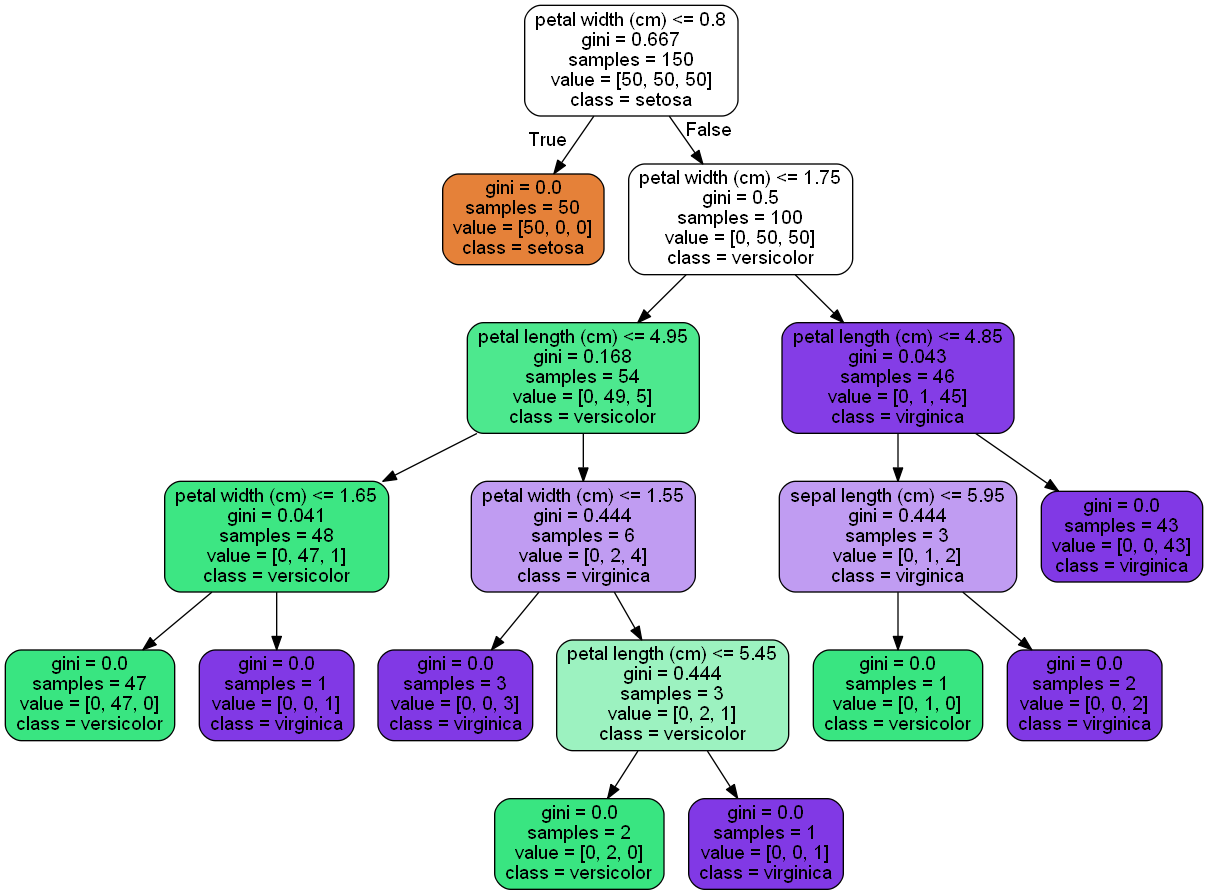

In [4]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree_clf, 
              out_file=None,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              rounded=True,
              filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

### Visualizing with dtreeviz

The previous visualization is a common one for showing a decision tree. However, it lacks some explanatory power that some visualizations may provide.

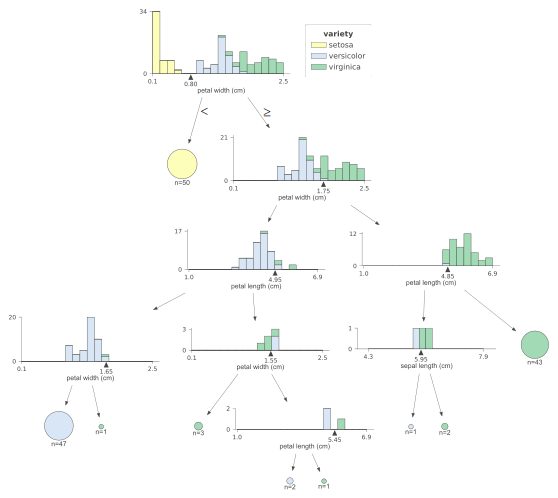

In [5]:
from dtreeviz.trees import *

viz = dtreeviz(tree_clf,
              iris.data,
              iris.target,
              target_name='variety',
              feature_names=iris.feature_names,
              class_names=["setosa", "versicolor", "virginica"])

viz

In [ ]:
# Open a seperate window

viz.view()

### Criteria for Splitting Each Node

Decision tree algorithms may have different criteria in which each node is split.

First, consider the general case of Information Gain which is what we are concerned about when splitting each node. 

$$IG(D_{p}, a) = I(D_{p}) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$

* $IG$: Information Gain
* $a$: feature to perform the split
* $N_p$: number of samples in the parent node
* $N_{left}$: number of samples in the left child node
* $N_{right}$: number of samples in the right child node
* $I$: impurity
* $D_{p}$: training subset of the parent node
* $D_{left}$: training subset of the left child node
* $D_{right}$: training subset of the right child node

The intuition is that every time a parent node is split, information gain should be maximized. 

This also means that greater purity of the child nodes (depending on the impurity measure we choose) will result in higher information gain. 

### Measures of Impurity

There are several measures of impurity that are used in the classification context. These include Entropy, Gini Impurity, and
Misclassification Error. 

#### Entropy

$$I_H(t) = - \sum_{i =1}^{C} p(i \mid t) \;log_2 \,p(i \mid t)$$

The intuition for the entropy equation is that it sums up probablities for each class at a particular node and gives us a value for the amount of information contained in a node. A higher number is worse because it means insight cannot be derived from that particular split. All the samples in a particular node belonging to the same class would result in an entropy of 0. 

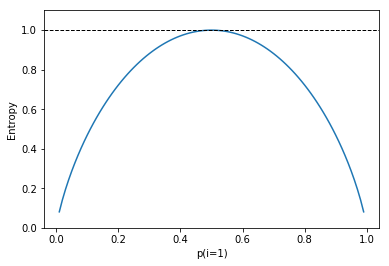

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

### Gini Impurity

The impurity measure used above for the Iris example is a different but related concept. In practice, Entropy and Gini Impurity give similar results and both can be used in scikit-learn. 

$$I_G(t) =  \sum_{i =1}^{C}p(i \mid t) \big(1-p(i \mid t)\big)$$

A difference is that for Gini Impurity, a 50/50 split will result in a measure of 0.5. A 50/50 split for a node while utilizing entropy as a criteria will result in an entropy of 1.

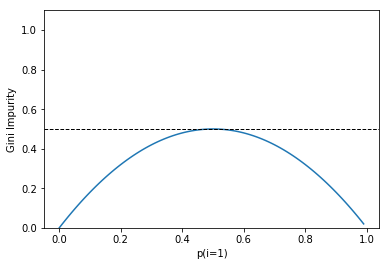

In [7]:
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

### Misclassification Error

$$I_M(t) =  1 - max\{{p_i}\}$$

Misclassification error can also be utilized but it gives far war worse results as can be visualized below.

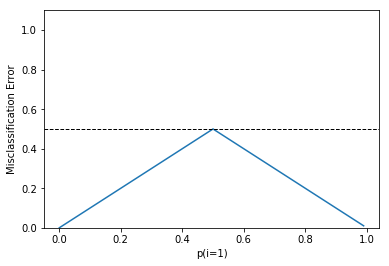

In [8]:
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
err = [error(i) for i in x]
plt.plot(x, err)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Misclassification Error')
plt.show()

### Comparison of Different Criteria

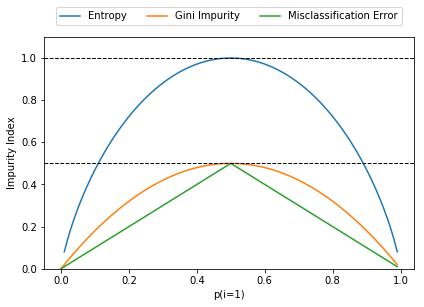

In [9]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab in zip([ent, gini(x), err], 
                  ['Entropy', 'Gini Impurity', 'Misclassification Error']):
    line, = ax.plot(x, i, label=lab)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()

### Different Implementations of Decision Tree Algorithms

#### Iterative Dichotomizer 3
* One of the earlier decision tree algorithms
* Only discrete/categorical features. No numeric features.
* Can split more than two categories
* Short and wide trees
* Prone to overfitting
* No pruning of nodes which is related to above
* Information gain maximizer and entropy minimizer

#### C4.5
* Can input both continuous and discrete features
* Use information gain ratio which divides the information gain by the individual feature entropy
* Handles missing attributes by ignoring them
* Post-pruning which reduces overfitting

#### CART

* Both continuous and discrete features
* Only binary splits which results in tall trees
* Can create regression trees
* Also does pruning but uses cost-complexity pruning

### Avoiding Overfitting and Selecting Parameters

The pruning that C4.5, CART utilize helps avoid some overfitting. However, it is important to consider some other methods and parameters to prevent overfitting when using decison trees. Decision trees are a non-parametric model which just means they make no assumptions about the shape of the data. A counter-example would be a linear model which makes explicit assumptions about the shape of the data. This means that decision trees can be prone to overfitting.

Note that a non-parametric model does not mean that it lacks parameters. It means those parameters are not determined prior to training. 

This freedom to conform to the data often requires regularization of a decision tree during training. 

Some of the parameters that can be considered to be used for the purposes of regularization include:

* max_depth: reduce the max depth of the tree
* min_samples_split: minimum number of samples a node must have before it can be split
* min_samples_leaf: minimum number of samples a leaf must have 
* min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the ottal number of weighted instances
* max_leaf_nodes: maximum number of leaf nodes
* max_features: maximum numbr of features that are evaluated for splitting at each node

# Conclusion and Further Thoughts

Decision trees are very useful for analyzing and visualizing a particular problem or use case. They are generally not the best or perfect solution and have limitations. However, they often form the basis of better techniques and models such as bagging, boosting, and random forests. This upgrade in performance comes at the cost of interpretability which is one of the main benefits of an individual decision tree. Keep in mind the trade-offs and considerations when constructing an individual decision tree before utilizing them in more advanced models such as random forests. 